**Predicting Lung Cancer the Smart Way**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**What the model will predict**

The goal is to develop a model that can analyze the features and predict whether a patient is at risk of developing lung cancer. We have to identify the stages of cancer whether it is low, medium or high.

**Libraries**

In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

**Data Load**

In [ ]:
path= "/content/drive/MyDrive/Cancer Dataset/cancer patient data sets.csv"
df = pd.read_csv(path)

In [ ]:
df.shape
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


**Data Analysis**

In [ ]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
#checking first five rows by calling df.head()
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#checking last five rows by calling df.tail()
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
#check null value
df.isnull().values.any()

np.False_

In [ ]:
df.isna().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [ ]:
#check statistics
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


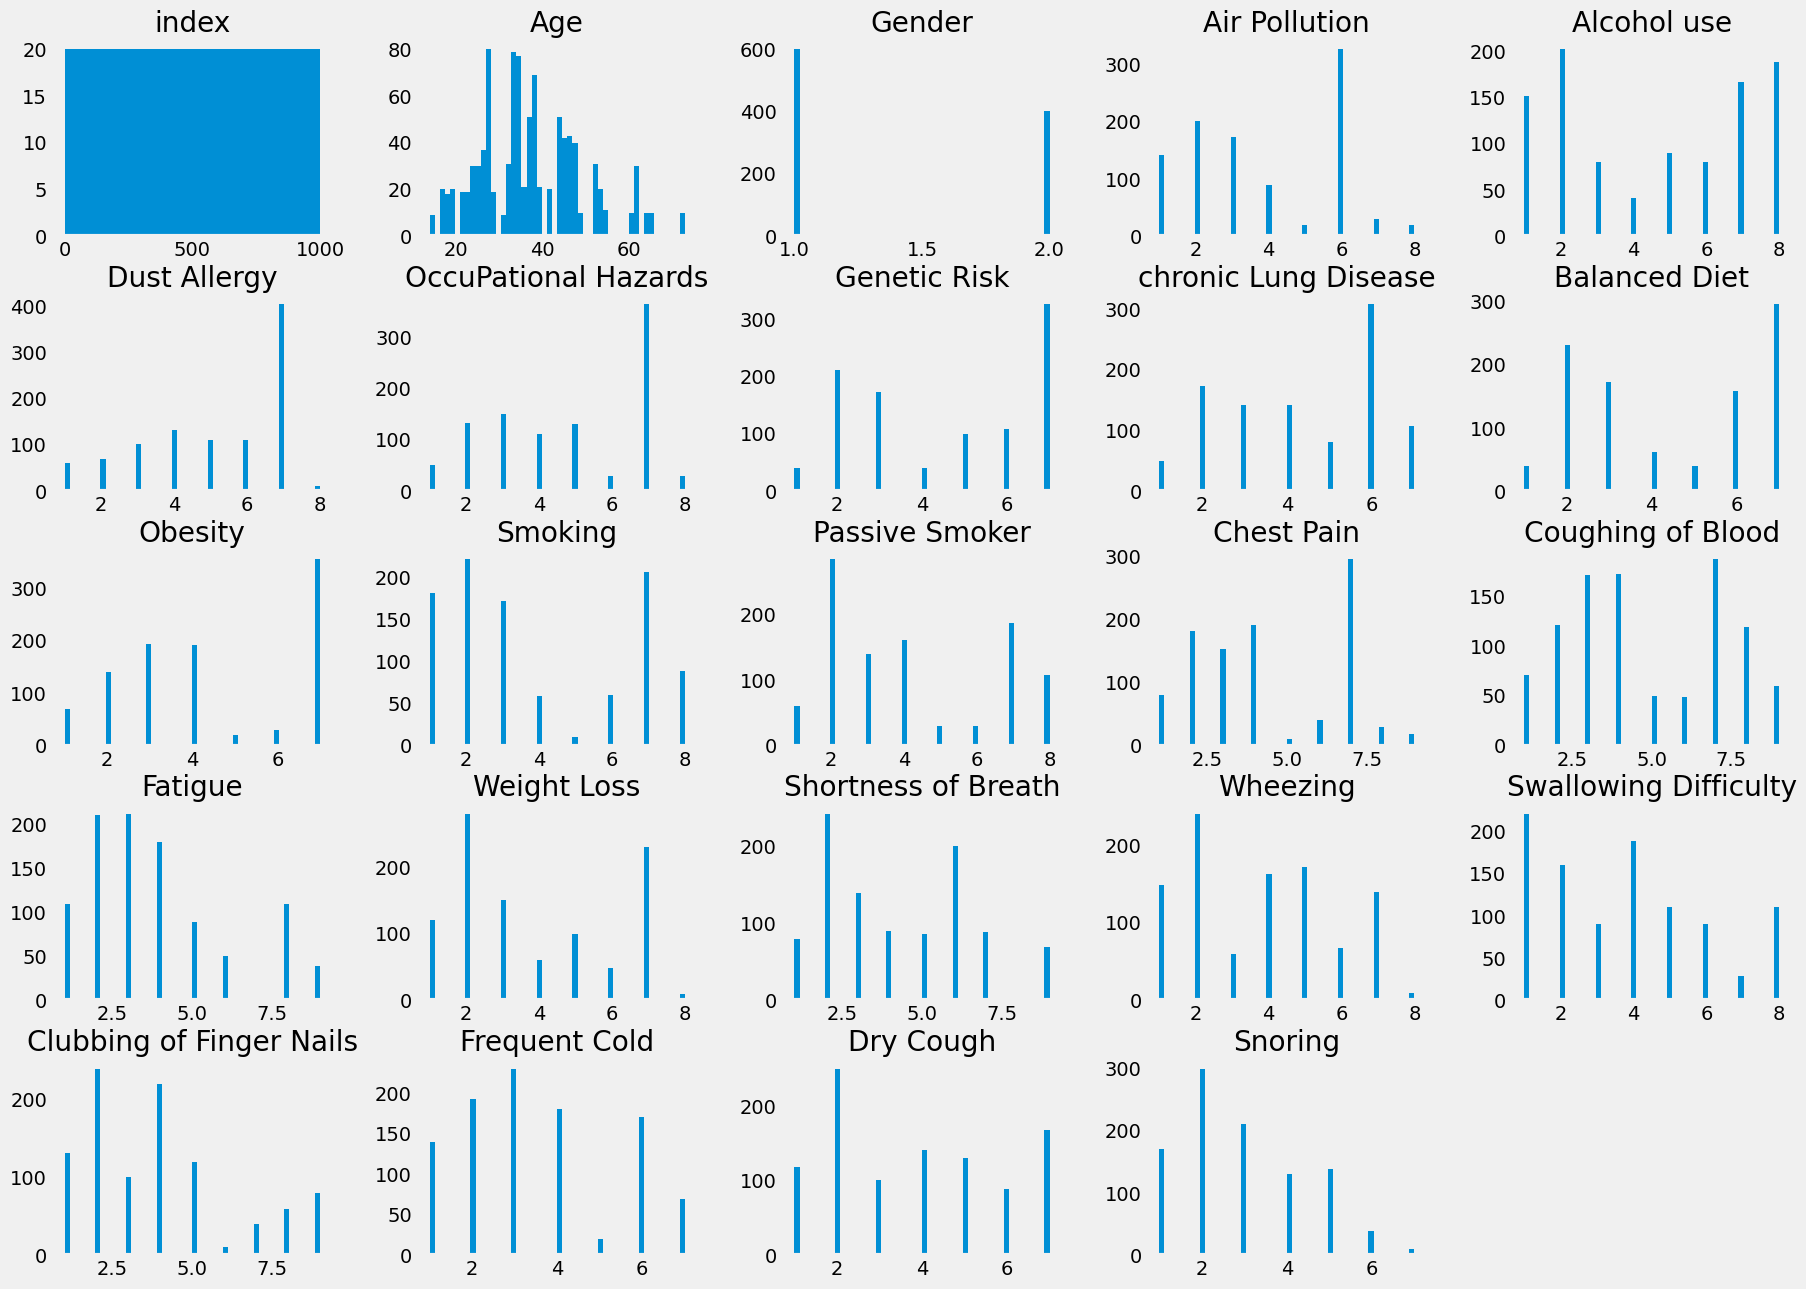

In [ ]:
#check numeric value
df.hist(bins = 50, grid = False, figsize = (20,15));

**Exploratory Data Analysis(EDA)**

In [ ]:
#check the Level
df.Level.value_counts()

,count
Level,
High,365
Medium,332
Low,303


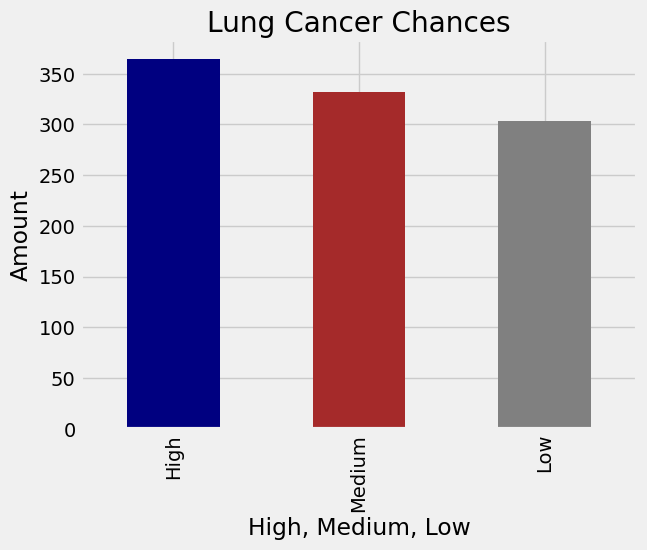

In [ ]:
df.Level.value_counts().plot(kind = 'bar', color = ['navy', 'brown', 'grey'])
plt.title("Lung Cancer Chances")
plt.xlabel("High, Medium, Low")
plt.ylabel("Amount");

In [ ]:
#check which gender has most heart disease
df.Gender.value_counts()

1    598
2    402
Name: Gender, dtype: int64

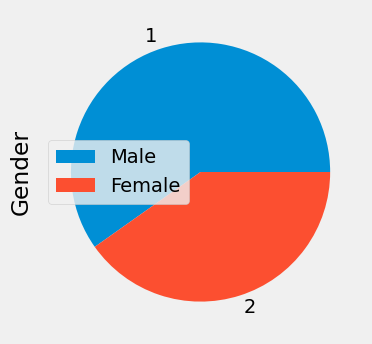

In [ ]:
df.Gender.value_counts().plot(kind = 'pie', figsize = (6,4))
plt.legend(["Male", "Female"]);

In [ ]:
pd.crosstab(df.Gender, df.Level)

Level,High,Low,Medium
Gender,,,
1,252,149,197
2,113,154,135


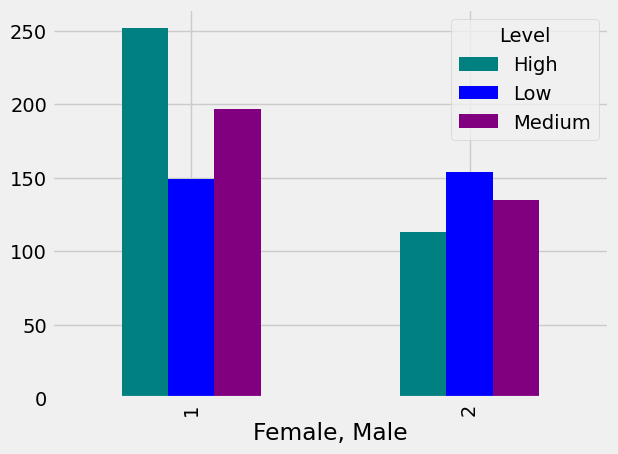

In [ ]:
pd.crosstab(df.Gender, df.Level).plot(kind = 'bar', color = ['teal', 'blue', 'purple'])
plt.title("")
plt.xlabel('Female, Male');

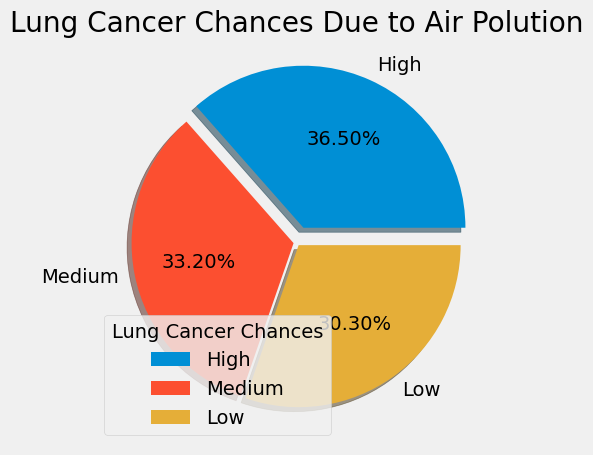

In [ ]:
plt.figure(figsize = (7, 5))
plt.title("Lung Cancer Chances Due to Air Polution")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left");

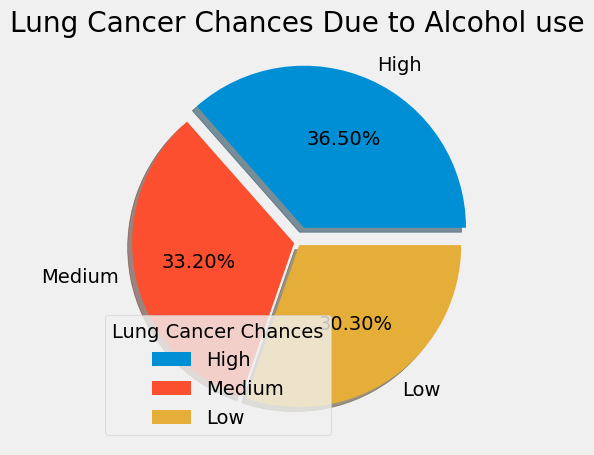

In [ ]:
plt.figure(figsize = (7, 5))
plt.title("Lung Cancer Chances Due to Alcohol use")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left");

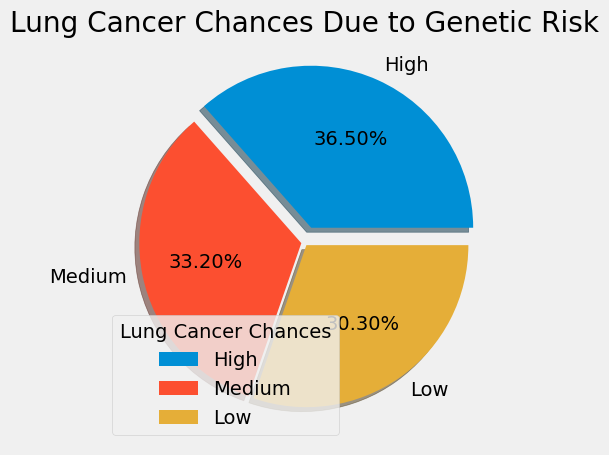

In [ ]:
plt.figure(figsize = (7, 5))
plt.title("Lung Cancer Chances Due to Genetic Risk")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left");

**Separating Independend Columns From Target Columns & Drop Column**

In [ ]:
X = df.copy().dropna()
X.drop('index', axis=1, inplace=True)
X.drop('Patient Id', axis=1, inplace=True)
y = X.pop('Level')

features_num = ['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']

In [ ]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
y

,Level
0,Low
1,Medium
2,High
3,High
4,High
...,...
995,High
996,High
997,High
998,High


**Data pre-processing**

In [ ]:
#Data pre-processing
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
)

In [ ]:
X.shape

(1000, 23)

**Splitting Train & Test Data**

In [ ]:
#spliting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9598)

In [ ]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
X_train.shape

(750, 23)

In [ ]:
X_test.shape

(250, 23)

**CLASSIFICATION PROBLEM**

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

**Deep Learning**

1.**ANN Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

**Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3715 (14.51 KB)
Trainable params: 3715 (14.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Visualize the neural network architecture**

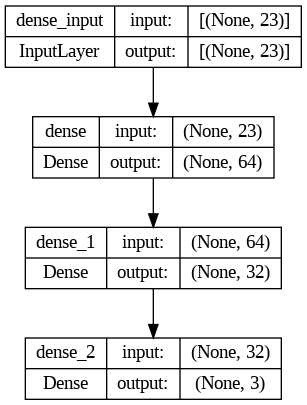

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Level_model.png', show_shapes=True)

**Compile the model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
    metrics=['accuracy'],  # Use 'accuracy' for multiclass classification
)

**Train the model**

In [ ]:
# Train the model with the provided data
history = model.fit(
    X_train,                # Training data
    y_train_one_hot,        # Training labels (one-hot encoded)
    validation_data=(X_test, y_test_one_hot),  # Validation data
    batch_size=512,         # Batch size for training
    epochs=50,              # Maximum number of epochs for training
)

Epoch 1/50
2/2 [==============================] - 4s 329ms/step - loss: 1.1922 - accuracy: 0.3973 - val_loss: 1.1250 - val_accuracy: 0.3960
Epoch 2/50
2/2 [==============================] - 0s 52ms/step - loss: 1.0831 - accuracy: 0.4693 - val_loss: 1.0242 - val_accuracy: 0.5080
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 0.9840 - accuracy: 0.5533 - val_loss: 0.9335 - val_accuracy: 0.5680
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 0.8958 - accuracy: 0.6053 - val_loss: 0.8534 - val_accuracy: 0.5920
Epoch 5/50
2/2 [==============================] - 0s 30ms/step - loss: 0.8198 - accuracy: 0.6467 - val_loss: 0.7824 - val_accuracy: 0.6800
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.7501 - accuracy: 0.7600 - val_loss: 0.7179 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 0.6882 - accuracy: 0.8427 - val_loss: 0.6599 - val_accuracy: 0.8720
Epoch 8/50
2/2 [==========

**Predection**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

8/8 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [Fa

**Create Plot**

<Axes: title={'center': 'Accuracy'}>

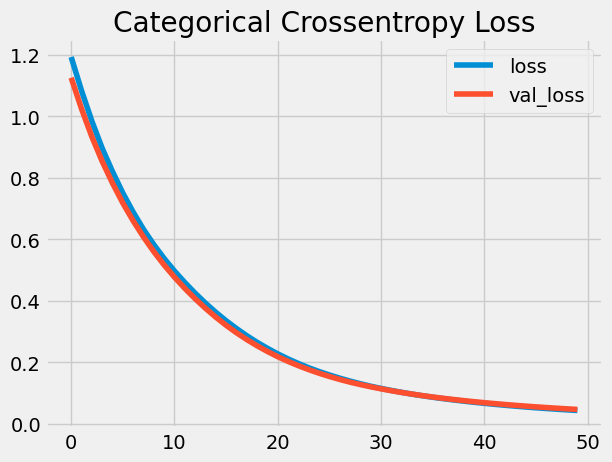

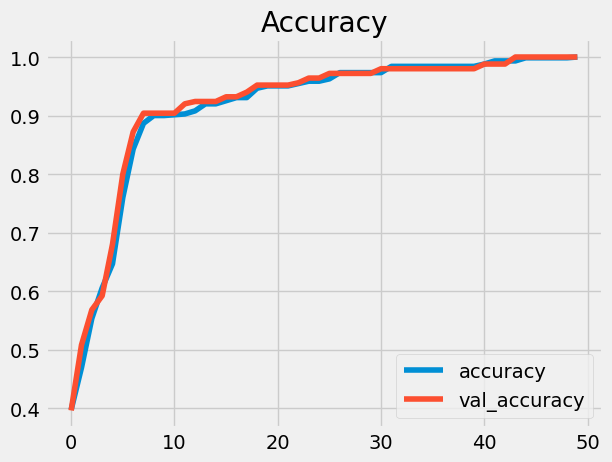

In [ ]:
# Create a DataFrame to store the training history
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
history_df.loc[:, ['loss', 'val_loss']].plot(title="Categorical Crossentropy Loss")

# Plot the training and validation accuracy
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

2.**CNN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [ ]:
# Assuming your data is in 1D format
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Create the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output before passing to the dense layer
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

**Model Summary**

In [ ]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

**Visualize the neural network architecture**

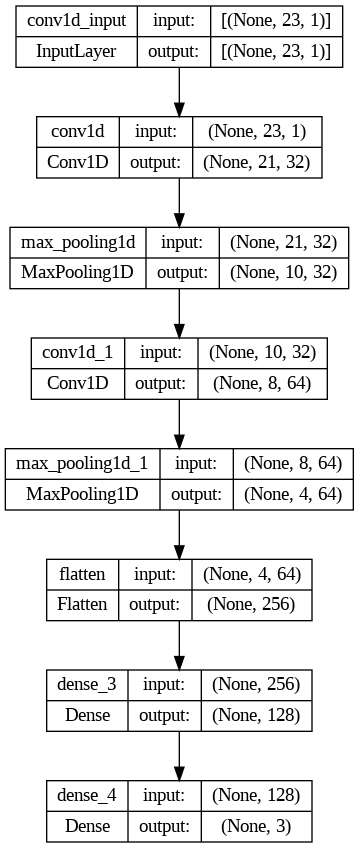

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='Level_model.png', show_shapes=True)

**Compile the model**

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model**

In [ ]:
# Train the model
history=model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_one_hot))

Epoch 1/10
24/24 [==============================] - 1s 13ms/step - loss: 0.6471 - accuracy: 0.8093 - val_loss: 0.2935 - val_accuracy: 0.8760
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy: 0.9413 - val_loss: 0.1431 - val_accuracy: 0.9760
Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9800 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/10
24/24 [=

**Prediction**

In [ ]:
y_pred_one_hot = model.predict(X_test_reshaped)
y_pred_one_hot

8/8 [==============================] - 0s 4ms/step


array([[9.99679685e-01, 7.27374516e-09, 3.20288207e-04],
       [9.99230146e-01, 4.30223190e-05, 7.26859667e-04],
       [9.99666929e-01, 7.15146697e-09, 3.33052623e-04],
       [9.98226166e-01, 5.65714843e-04, 1.20810245e-03],
       [1.84335445e-08, 2.32274598e-03, 9.97677267e-01],
       [6.09256904e-06, 2.17842215e-04, 9.99776125e-01],
       [1.39700400e-03, 3.03349900e-03, 9.95569468e-01],
       [1.00556619e-09, 9.99806643e-01, 1.93316562e-04],
       [9.99927819e-01, 2.56565963e-05, 4.65470985e-05],
       [9.59020341e-04, 3.71167180e-03, 9.95329380e-01],
       [9.99103427e-01, 3.79596058e-05, 8.58600019e-04],
       [1.04777046e-05, 1.89599395e-03, 9.98093486e-01],
       [9.99998629e-01, 1.51306470e-08, 1.29435955e-06],
       [9.98226166e-01, 5.65714843e-04, 1.20810245e-03],
       [1.11948652e-03, 9.89921689e-01, 8.95869359e-03],
       [5.12258021e-06, 1.16788367e-04, 9.99877989e-01],
       [3.49533849e-07, 9.99086261e-01, 9.13402881e-04],
       [5.34543868e-11, 9.99983

**Create Plot**

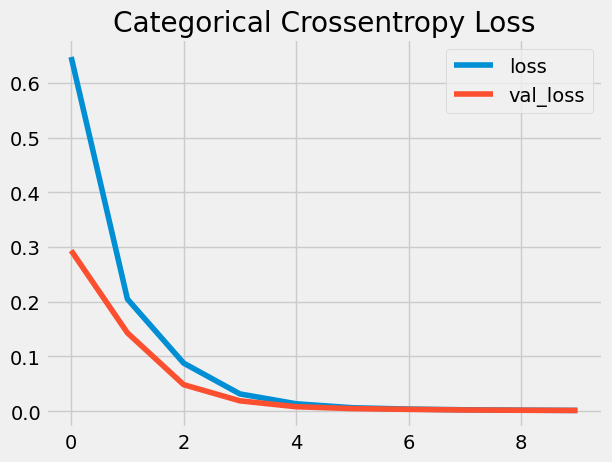

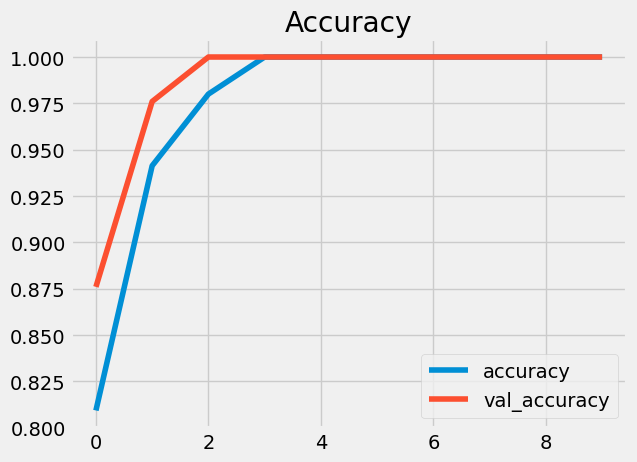

In [ ]:
# Create a DataFrame to store the training history
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
history_df.loc[:, ['loss', 'val_loss']].plot(title="Categorical Crossentropy Loss")

# Plot the training and validation accuracy
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

**Evaluate the model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming your model is already trained
# Use the model to predict on the test set
y_pred_one_hot = model.predict(X_test_reshaped)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Evaluate the model
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
classification_rep = classification_report(y_true_labels, y_pred_labels)

# Print accuracy and classification report
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_rep)

8/8 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[90  0  0]
 [ 0 69  0]
 [ 0  0 91]]
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



**ROC_AUC Curve**

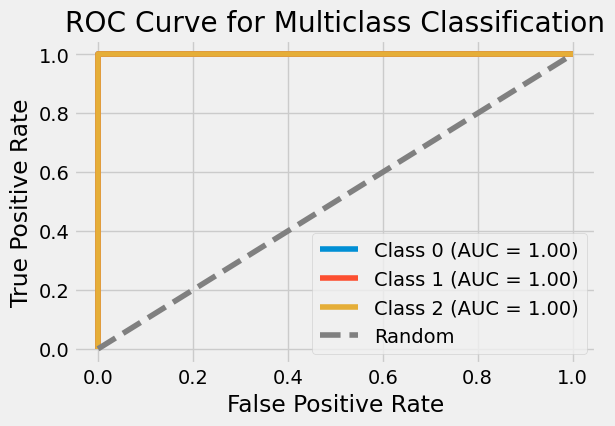

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_one_hot = label_binarize(y_true_labels, classes=np.unique(y_true_labels))

# Initialize variables to store fpr, tpr, and roc_auc for each class
fpr, tpr, roc_auc = dict(), dict(), dict()

# Calculate and plot ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(np.unique(y_true_labels))):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set plot labels and legend
plt.title('ROC Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Machine Learning**

1.**SVM Model**

In [ ]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Create an SVM model
svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale', decision_function_shape='ovr')

In [ ]:
# Fit the model on the training data
svm_model.fit(X_train, y_train_encoded)

SVC(C=1)

In [ ]:
#Training Score
svm_train_score = svm_model.score(X_train, y_train_encoded)
svm_train_score

1.0

In [ ]:
# Prediction of the test variable
y_pred = svm_model.predict(X_test)
print(y_pred)

[0 0 0 0 2 2 2 1 0 2 0 2 0 0 1 2 1 1 0 1 2 1 2 0 1 2 0 0 0 2 1 2 2 2 0 2 2
 1 1 1 1 1 2 0 0 1 2 1 2 2 2 1 2 2 0 1 2 0 0 0 2 2 1 2 0 1 0 2 0 2 1 2 2 2
 2 2 2 1 0 0 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2 1 0 1 2 1 1 2 2 2 0 1 0 2 1 1
 1 0 2 2 1 1 2 2 0 2 0 0 1 2 1 2 1 0 0 0 1 0 0 1 2 0 2 0 2 1 2 2 2 2 0 2 1
 0 0 0 0 0 0 2 0 1 2 2 0 1 2 0 1 0 1 0 0 2 0 2 1 2 2 0 2 0 2 0 0 1 0 1 1 0
 0 0 0 2 2 1 1 2 0 1 1 2 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 1 2 2 0 2 2 0 2 2 0
 0 1 0 2 0 2 1 1 1 0 1 1 2 2 0 0 0 0 0 2 2 2 1 1 0 2 1 1]


In [ ]:
support_vectors = svm_model.support_vectors_
print("Number of support vectors:", len(support_vectors))

Number of support vectors: 99


In [ ]:
# Decode the predictions back to original labels
y_pred_original = le.inverse_transform(y_pred)
y_pred_original

array(['High', 'High', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'High', 'Medium', 'High', 'High', 'Low',
       'Medium', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'High', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'High', 'High', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'High', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High',
       'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', '

**Evaluate the model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming y_test_encoded and y_pred are already defined as in your code

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[90  0  0]
 [ 0 69  0]
 [ 0  0 91]]
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



**Linear Decision Boundary Plot**

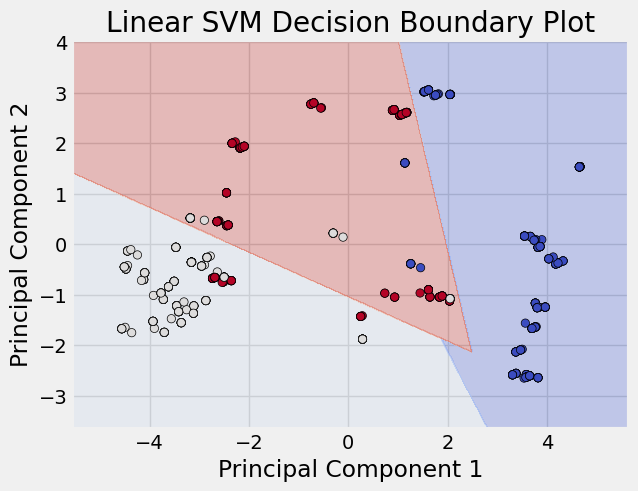

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Assuming X_train, y_train_encoded are already defined as in your code

# Reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Create a meshgrid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Fit a linear SVM model
linear_svm_model = SVC(kernel='linear', C=1)
linear_svm_model.fit(X_train_2d, y_train_encoded)

# Obtain decision boundary labels
Z = linear_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_encoded, cmap=plt.cm.coolwarm, edgecolors='k')

# Set plot labels and title
plt.title('Linear SVM Decision Boundary Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

1. Dimensionality Reduction: It uses PCA to reduce the dimensionality of the feature space to two dimensions (n_components=2).

2. Meshgrid Creation: It creates a meshgrid of points covering the range of the first two principal components.

3. Linear SVM Model: It fits a linear SVM model (SVC(kernel='linear', C=1)) on the 2D training data.

4. Decision Boundary Prediction: It predicts the labels for the points in the meshgrid to obtain the decision boundary.

5. Plotting: It plots the decision boundary and the training points in the reduced 2D space.

2. **LR**

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a Logistic Regression model
lr_model = LogisticRegression(C=1, solver='lbfgs', max_iter=500, random_state=11)

# Fit the model on the training data
lr_model.fit(X_train, y_train_encoded)

# Training Score
lr_train_score = lr_model.score(X_train, y_train_encoded)
print("Training Score (LR):", lr_train_score)

# Prediction of the test variable
y_pred_lr = lr_model.predict(X_test)
print("Predictions (LR):", y_pred_lr)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test_encoded, y_pred_lr)
print("Confusion Matrix (LR):\n", conf_matrix_lr)

# Accuracy
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
print("Accuracy (LR): {:.2f}%".format(accuracy_lr * 100))

# Classification Report
classification_rep_lr = classification_report(y_test_encoded, y_pred_lr)
print("Classification Report (LR):\n", classification_rep_lr)


Training Score (LR): 1.0
Predictions (LR): [0 0 0 0 2 2 2 1 0 2 0 2 0 0 1 2 1 1 0 1 2 1 2 0 1 2 0 0 0 2 1 2 2 2 0 2 2
 1 1 1 1 1 2 0 0 1 2 1 2 2 2 1 2 2 0 1 2 0 0 0 2 2 1 2 0 1 0 2 0 2 1 2 2 2
 2 2 2 1 0 0 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2 1 0 1 2 1 1 2 2 2 0 1 0 2 1 1
 1 0 2 2 1 1 2 2 0 2 0 0 1 2 1 2 1 0 0 0 1 0 0 1 2 0 2 0 2 1 2 2 2 2 0 2 1
 0 0 0 0 0 0 2 0 1 2 2 0 1 2 0 1 0 1 0 0 2 0 2 1 2 2 0 2 0 2 0 0 1 0 1 1 0
 0 0 0 2 2 1 1 2 0 1 1 2 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 1 2 2 0 2 2 0 2 2 0
 0 1 0 2 0 2 1 1 1 0 1 1 2 2 0 0 0 0 0 2 2 2 1 1 0 2 1 1]
Confusion Matrix (LR):
 [[90  0  0]
 [ 0 69  0]
 [ 0  0 91]]
Accuracy (LR): 100.00%
Classification Report (LR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        91

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted a

In [ ]:
# Decode the predictions back to original labels
y_pred_original = le.inverse_transform(y_pred_lr)
y_pred_original

array(['High', 'High', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'High', 'Medium', 'High', 'High', 'Low',
       'Medium', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'High', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'High', 'High', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'High', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High',
       'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', '

3. **RF**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10,random_state=11)

# Fit the model on the training data
rf_model.fit(X_train, y_train_encoded)

# Training Score
rf_train_score = rf_model.score(X_train, y_train_encoded)
print("Training Score (RF):", rf_train_score)

# Prediction of the test variable
y_pred_rf = rf_model.predict(X_test)
print("Predictions (RF):", y_pred_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print("Confusion Matrix (RF):\n", conf_matrix_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print("Accuracy (RF): {:.2f}%".format(accuracy_rf * 100))

# Classification Report
classification_rep_rf = classification_report(y_test_encoded, y_pred_rf)
print("Classification Report (RF):\n", classification_rep_rf)


Training Score (RF): 0.9893333333333333
Predictions (RF): [0 0 0 0 2 2 2 1 0 2 0 2 0 0 2 2 1 1 0 1 2 1 2 0 1 2 0 0 0 2 1 2 2 2 0 2 2
 1 1 1 1 1 2 0 0 1 2 1 2 2 2 1 2 2 0 1 2 0 0 0 2 2 1 2 0 1 0 2 0 2 1 2 2 2
 2 2 2 1 0 0 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2 1 0 1 2 1 1 2 2 2 0 1 0 2 1 1
 1 0 2 2 1 1 2 2 0 2 0 0 1 2 1 2 1 0 0 0 1 0 0 1 2 0 2 0 2 1 2 2 2 2 0 2 1
 0 0 0 0 0 0 2 0 1 2 2 0 1 2 0 1 0 1 0 0 2 0 2 1 2 2 0 2 0 2 0 0 1 0 1 1 0
 0 0 0 2 2 1 1 2 0 1 1 2 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 1 2 2 0 2 2 0 2 2 0
 0 2 0 2 0 2 1 1 1 0 1 1 2 2 0 0 0 0 0 2 2 2 1 1 0 2 1 1]
Confusion Matrix (RF):
 [[90  0  0]
 [ 0 67  2]
 [ 0  0 91]]
Accuracy (RF): 99.20%
Classification Report (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.97      0.99        69
           2       0.98      1.00      0.99        91

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       

In [ ]:
# Decode the predictions back to original labels
y_pred_original = le.inverse_transform(y_pred_rf)
y_pred_original

array(['High', 'High', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'High', 'Medium', 'High', 'High',
       'Medium', 'Medium', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'High', 'High', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'High',
       'High', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium', 'High', 'High',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High',
       'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Low',
       'High', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium'

4. **DT**

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a Decision Tree model
dt_model =DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10, random_state=11)

# Fit the model on the training data
dt_model.fit(X_train, y_train_encoded)

# Training Score
dt_train_score = dt_model.score(X_train, y_train_encoded)
print("Training Score (DT):", dt_train_score)

# Prediction of the test variable
y_pred_dt = dt_model.predict(X_test)
print("Predictions (DT):", y_pred_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_encoded, y_pred_dt)
print("Confusion Matrix (DT):\n", conf_matrix_dt)

# Accuracy
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
print("Accuracy (DT): {:.2f}%".format(accuracy_dt * 100))

# Classification Report
classification_rep_dt = classification_report(y_test_encoded, y_pred_dt)
print("Classification Report (DT):\n", classification_rep_dt)


Training Score (DT): 0.8893333333333333
Predictions (DT): [0 0 0 0 1 2 2 1 0 2 0 2 0 0 0 2 1 1 0 1 2 1 2 0 1 2 0 0 0 1 1 2 2 2 0 2 2
 1 1 1 1 1 2 0 0 1 2 1 2 2 2 1 1 2 0 1 1 0 0 0 2 2 1 2 0 1 0 1 0 2 1 2 2 2
 1 2 2 1 0 0 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 1 1 0 1 1 1 1 2 2 2 0 1 0 2 1 1
 1 0 0 2 1 1 2 2 0 1 0 0 1 2 1 2 1 0 0 0 1 0 0 1 2 0 1 0 2 1 2 2 2 1 0 2 1
 0 1 0 0 0 0 2 0 1 1 1 0 1 2 1 1 0 1 0 0 1 0 2 1 2 1 0 1 0 2 0 0 1 0 1 1 0
 0 0 0 2 2 1 1 2 0 1 1 2 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 1 2 0 0 2 1 0 1 1 0
 0 0 0 2 0 2 1 1 1 0 1 1 2 2 0 0 0 0 0 2 1 1 1 1 0 2 1 0]
Confusion Matrix (DT):
 [[88  2  0]
 [ 3 66  0]
 [ 2 21 68]]
Accuracy (DT): 88.80%
Classification Report (DT):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.74      0.96      0.84        69
           2       1.00      0.75      0.86        91

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.88       

In [ ]:
# Decode the predictions back to original labels
y_pred_original = le.inverse_transform(y_pred_dt)
y_pred_original

array(['High', 'High', 'High', 'High', 'Low', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'High', 'Medium', 'High', 'High', 'High',
       'Medium', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'High', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'High', 'High', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Medium',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'High', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'High', 'High', 'High', 'Medium', 'High', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium',
       'High', 'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'High',
       '

**Ensemble Model**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create the ensemble model without SVM
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('dt', dt_model)
    ],
    voting='hard'  # Use 'soft' only if all models support predict_proba
)

# Fit the ensemble model
ensemble_model.fit(X_train, y_train_encoded)

# Training Score
ensemble_train_score = ensemble_model.score(X_train, y_train_encoded)
print("Training Score (Ensemble):", ensemble_train_score)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)
print("Predictions (Ensemble):", y_pred_ensemble)

# Confusion Matrix
conf_matrix_ensemble = confusion_matrix(y_test_encoded, y_pred_ensemble)
print("Confusion Matrix (Ensemble):\n", conf_matrix_ensemble)

# Accuracy
accuracy_ensemble = accuracy_score(y_test_encoded, y_pred_ensemble)
print("Accuracy (Ensemble): {:.2f}%".format(accuracy_ensemble * 100))

# Classification Report
classification_rep_ensemble = classification_report(y_test_encoded, y_pred_ensemble)
print("Classification Report (Ensemble):\n", classification_rep_ensemble)


Training Score (Ensemble): 0.9893333333333333
Predictions (Ensemble): [0 0 0 0 2 2 2 1 0 2 0 2 0 0 0 2 1 1 0 1 2 1 2 0 1 2 0 0 0 2 1 2 2 2 0 2 2
 1 1 1 1 1 2 0 0 1 2 1 2 2 2 1 2 2 0 1 2 0 0 0 2 2 1 2 0 1 0 2 0 2 1 2 2 2
 2 2 2 1 0 0 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2 1 0 1 2 1 1 2 2 2 0 1 0 2 1 1
 1 0 2 2 1 1 2 2 0 2 0 0 1 2 1 2 1 0 0 0 1 0 0 1 2 0 2 0 2 1 2 2 2 2 0 2 1
 0 0 0 0 0 0 2 0 1 2 2 0 1 2 0 1 0 1 0 0 2 0 2 1 2 2 0 2 0 2 0 0 1 0 1 1 0
 0 0 0 2 2 1 1 2 0 1 1 2 1 2 0 1 0 2 2 0 0 2 2 0 0 1 0 1 2 2 0 2 2 0 2 2 0
 0 0 0 2 0 2 1 1 1 0 1 1 2 2 0 0 0 0 0 2 2 2 1 1 0 2 1 1]
Confusion Matrix (Ensemble):
 [[90  0  0]
 [ 2 67  0]
 [ 0  0 91]]
Accuracy (Ensemble): 99.20%
Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.97      0.99        69
           2       1.00      1.00      1.00        91

    accuracy                           0.99       250
   macro avg       0

In [ ]:
# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Decode the predictions to original labels
y_pred_ensemble_original = le.inverse_transform(y_pred_ensemble)
print("Decoded Predictions (Ensemble):", y_pred_ensemble_original)


Decoded Predictions (Ensemble): ['High' 'High' 'High' 'High' 'Medium' 'Medium' 'Medium' 'Low' 'High'
 'Medium' 'High' 'Medium' 'High' 'High' 'High' 'Medium' 'Low' 'Low' 'High'
 'Low' 'Medium' 'Low' 'Medium' 'High' 'Low' 'Medium' 'High' 'High' 'High'
 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Medium' 'High' 'High' 'Low' 'Medium' 'Low'
 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'High' 'Low' 'Medium'
 'High' 'High' 'High' 'Medium' 'Medium' 'Low' 'Medium' 'High' 'Low' 'High'
 'Medium' 'High' 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Low' 'High' 'High' 'High' 'Medium' 'High' 'Low' 'High'
 'Low' 'High' 'Low' 'Low' 'High' 'Low' 'Medium' 'High' 'High' 'Medium'
 'Medium' 'Low' 'High' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium'
 'Medium' 'High' 'Low' 'High' 'Medium' 'Low' 'Low' 'Low' 'High' 'Medium'
 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'High' 'Medium' 'High' 'High'
 'Low' 'Medium' 'Low' 'Medium' 'L